**AUTHOR : ANJU M NAIR**


**TASK 1** : **PREDICTION USING SUPERVISED ML**

**PROBLEM STATEMENT** :
                                                                               
                                                                               
1.Predict the percentage of a student based on the number of study hours
     2. Find the predicted score if a student studies for 9.5 hours.

(This is a simple linear regression task as it involves only two variables)

**IMPORTING LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#**Reading The Data For Analysis**

In [5]:
data = pd.read_excel (r'/content/task.xlsx')
data.head()

,HOURS,SCORES
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#basic informations
data.shape

(25, 2)

In [7]:
data.shape[0] # To check for the no. of rows

25

In [8]:
data.shape[1] # To check for the no. of columns

2

In [9]:
data.columns # To list down the column names

Index(['HOURS', 'SCORES'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HOURS   25 non-null     float64
 1   SCORES  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.isnull().sum() # Total no. of null values in each column

HOURS     0
SCORES    0
dtype: int64

#Statistical summary

In [12]:
data.describe()

,HOURS,SCORES
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Observations**

Data size/strength = 25
No. of random variables = 2
No. of columns containing null values = 0

**DATA VISUALIZATION**


Plotting the data points to check for any relationship between the two variables.

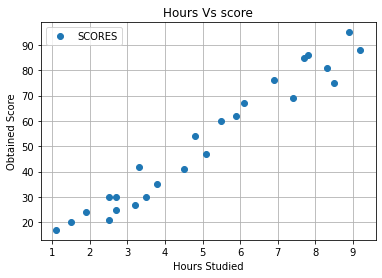

In [13]:
data.plot(x='HOURS', y='SCORES', style='o')  
plt.title('Hours Vs score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Obtained Score')  
plt.grid()
plt.show()

From the graph, It is understood that there is a positive linear relation between the number of hours studied and the score obtained.

In [14]:
data.corr()

,HOURS,SCORES
HOURS,1.000000,0.976191
SCORES,0.976191,1.000000


**Plotting the strength/correlation of the data points**

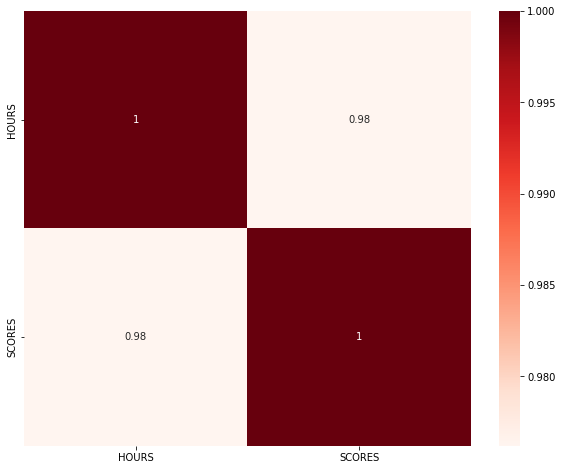

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Reds',)

Checking for outliers via boxplot.

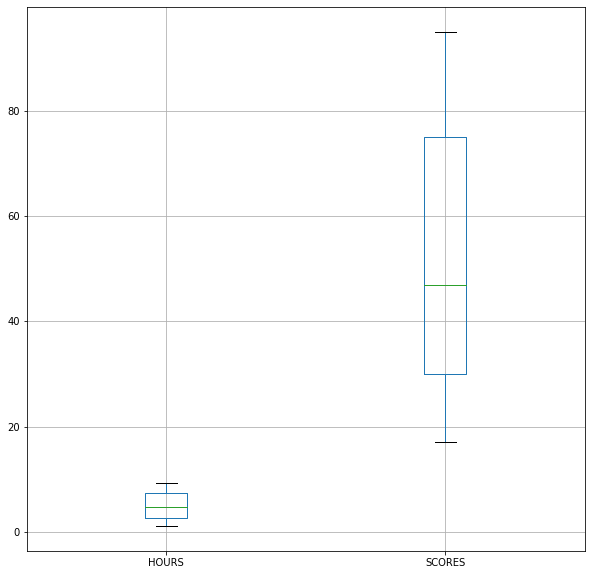

In [16]:
plt.figure(figsize=(10,10))
data.boxplot()

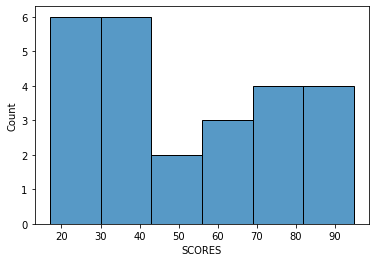

In [17]:
sns.histplot(data.SCORES)

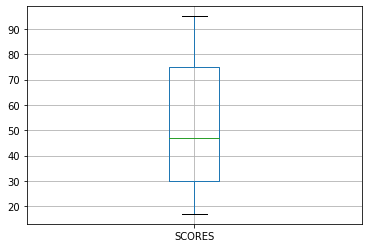

In [18]:
data[['SCORES']].boxplot()

**PREPARING THE DATA**

In [19]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


**LINEAR REGRESSION**

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

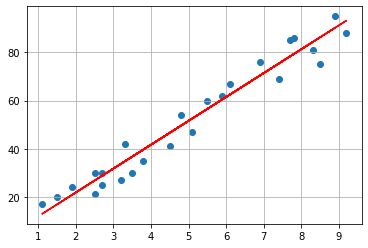

In [22]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.grid()
plt.show()

In [23]:
# Testing data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# Model Prediction 
y_pred = regressor.predict(X_test)

In [25]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


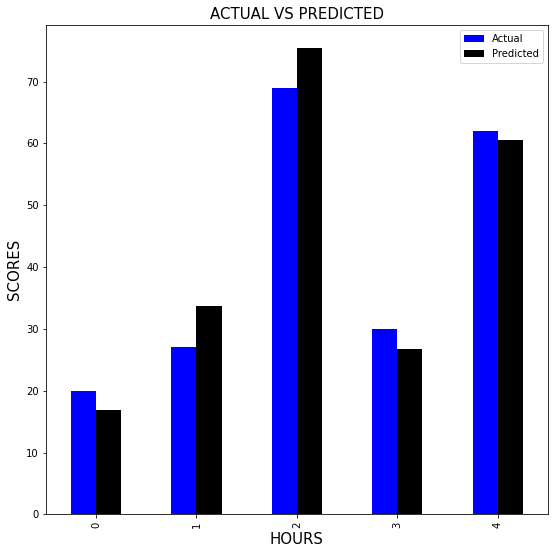

In [27]:
#Depicting the difference between the actual and predicted value via Bar graph

data.plot.bar(color=['blue','black'],figsize=(9,9))
plt.xlabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.ylabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.title("ACTUAL VS PREDICTED",fontdict={'color':'black','fontsize':15})
plt.show()

PREDICTING THE SCORE OF A STUDENT STUDIED FOR 9.25 HOURS

In [28]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**MODEL EVALUATION**


Mean Absolute Error(MAE): MAE measures the differences between prediction and actual observation.

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


**MSE**

 mean of the squared difference between the predicted value and the observed value.

In [30]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.598769307217456


R-squared(Coefficient of Determination)

 measure of how close the data are to the fitted regression line.

In [31]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.647447612100373


In [32]:
print('R-2:', metrics.r2_score(y_test, y_pred))

R-2: 0.9454906892105354


**CONCLUSION**

1.Successfully created a Simple linear Regression model to predict score of the student based on the study hours.By the model evaluation , there is not much difference in actual or predicted value , means error is less.The R-Square value is 0.94 quite close to 1.

2. A student studying for 9.5 hrs would score a percentage of 93.7%


